# Discovery Report Helper (Beta)

This is a Jupyter Notebook to help parse Discovery Reports produced by the Preassembly app at https://sul-preassembly-prod.stanford.edu.  In particular, given a discovery report, it will:
- find any errors detected by the preassembly app and show you the druids affected.
- show you the summary information from the discovery report.

There is an explanation of the different errors that can be detected by Preassembly at  https://github.com/sul-dlss/pre-assembly/wiki/Explanation-of-possible-errors-in-a-discovery-report

## 1. Download Your Discovery Report from Preassembly

You will need to download your discovery report from the preassembly application

## 2.  Upload your discovery report

You will need to upload it to the `discovery_reports` folder here and ensure it has a unique name, preferably ending in `.json` just as you received it.  You can keep the name given by the preassembly app, or you can choose a different name, such as `naomi_boardgames.json`

Click on the folder in the far left navigation bar to see the `discovery_reports` folder.  Open it, and then click the 
arrow with the line under it to upload your file to the folder.

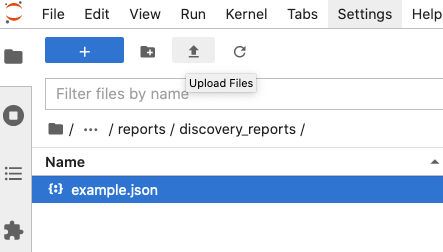

### 2.1  Ensure Your Discovery Report is parseable json

Once your file is uploaded, you can double click on it and it will open a new tab here in the notebook.  If the json parses cleanly, it will look something like this:

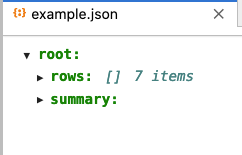

## 3. Put the Name of Your Report In the Following Cell

In the cell below, paste your discovery report name to replace `example.json`

In [37]:
# put your discovery report file name inside the quotes on the right side of the =
file_name = "example.json"

## 4. Get the Summary from your Discovery Report

Run the code in the following cell. It should output the summary information in a yucky format just below the cell with python code in it.

In [41]:
import json
with open("./discovery_reports/" + file_name, 'r') as f:
    data = json.load(f)
summary = data.pop('summary')
summary['total number of objects'] = len(items)
summary

{'objects_with_error': 3,
 'mimetypes': {'image/jpeg': 1320},
 'start_time': '2021-10-18 12:03:45 -0700',
 'total_size': 1108060670,
 'total number of objects': 7}

## 5. Get the Errors with Druids from your Discovery Report

Run the code in the following cell.  It should output a table with a row for each error occuring in the report, and a column for each druid implicated.

In [80]:
# Get the druids for each possible error
import pandas as pd
import numpy as np

# read and parse the json report and load it into a pandas DataFrame
with open("./discovery_reports/" + file_name, 'r') as f:
    dfItems = pd.json_normalize(json.load(f), 'rows')
dfItems.set_index('druid', inplace=True)

# create a new pandas DataFrame where each row is an error that actually occurs in the discovery report.
possible_errors = [
    'dor_connection_error', 
    'dupes', 
    'empty_files', 
    'empty_object', 
    'filename_no_extension',  
    'item_not_registered', 
    'missing_files',
    'empty_manifest',
    'files_found_mismatch',
    'missing_media_container_name_or_manifest'
     ]
errs2druids_dict = {}
for error in possible_errors:
    error_column = "errors.% s" % error
    if ((error_column) in dfItems.columns):
        error_druids = (dfItems[(dfItems[error_column] == True)]).index.tolist()
        errs2druids_dict[error] = error_druids
# Ensure all the errors have the same number of values
dfErrors_raw = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in errs2druids_dict.items() ]))
# Replace empty values with empty string
dfErrors_better = dfErrors.replace(np.nan, '', regex=True) 
# Make the errors the index (rows) and the druids the columns
# dfErrors.transpose()
# adjust the output style for DataFrames (monospaced font)
dfErrors_better.transpose().style.set_table_attributes('style="font-family: Monaco; font-size: 14px"')

NameError: name 'np' is not defined

### 5.1 Explanation of Errors

There is an explanation of the different errors that can be detected by Preassembly at https://github.com/sul-dlss/pre-assembly/wiki/Explanation-of-possible-errors-in-a-discovery-report